# New Section

### About the data:

The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country.

#### Columns:

- Date: Date when the house is ready for sale. 
- Price: Price of the house to be sold.
- Bedrooms: No. of bedrooms in the house.
- Bathrooms: No. of bathrooms in the house.
- Sqft_living: Squarefoot of Living in the house.
- Sqft_lot: Squarefoot of Floor in the house. 
- Floors: Floors on which living area located. 
- Waterfront: If waterfront available in front of house.
- View: Vie from the house.
- Condition: Condition of the house.
- Sqft_above: Squarefoot above is the space available at roof. 
- Sqft_basement: Squarefoot basement is the space available at the basement.
- Yr_built: In which year the house is built.
- Yr_renovated: Year of renovation.
- Street: On which street house is located.
- City: City in which the country is located.
- Statezip: Zip code of the area in which house is located.
- Country: Country is US.

# New Section

`**Here the task is to predict the price of house(dependent variable) located in the cities of US, with the help of other essential features (independent variable) available in our dataset.**`

In [1]:
#Importing Required Libraries
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np
import xgboost
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import ensemble
%matplotlib inline

In [3]:
!pip install scikit-learn

  Using cached https://files.pythonhosted.org/packages/a8/eb/a48f25c967526b66d5f1fa7a984594f0bf0a5afafa94a8c4dbc317744620/scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl


Let's dive into our dataset.

In [2]:
data = pd.read_csv('/content/data.csv')

In [3]:
df = data.copy()
df.head(3) #print csv

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


`Now firstly let's get a description about our dataset.`

In [4]:
df.shape #check number of rows and columns

(4600, 18)

In [5]:
df.dtypes #check datatypes of the column variables

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [6]:
df.isnull().sum() #check number of null values in the columns

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
df.describe() #check statistical values of each column to get better insights

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
'''
from the above analysis we can see that we have '0' as a value in price column, which is impossible in the real usecase. Lets find out the 
count of '0' in all the columns
'''
df[df==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

In [9]:
''' 
Lets check the other values of variables by using aggregation function
Now, some of the columns like waterfront, view, sqft_above and sqft_basement seems more authentic to be 0s in their values because a house 
might not have waterfront or any view or basement area and might not be ever renovated.
'''
df[df["price"]==0].agg([min, max, 'mean', 'median'])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
min,2014-05-05 00:00:00,0.0,1.000000,1.00000,720.000000,3500.000000,1.0,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000,101-127 247th Ave SE,Auburn,WA 98001,USA
max,2014-07-08 00:00:00,0.0,6.000000,6.25000,8020.000000,188200.000000,3.0,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000,9243 NE 20th St,Woodinville,WA 98199,USA
mean,NaN,0.0,3.979592,2.69898,2787.142857,16453.306122,1.5,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286,NaN,NaN,NaN,NaN
median,NaN,0.0,4.000000,2.50000,2600.000000,9000.000000,1.5,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000,NaN,NaN,NaN,NaN


In [10]:
'''
So, 0 price houses have ~4 bedrooms, ~2.5 bathrooms and ~2800 sqft living.

As we discussed above these are some major columns on which price depends. So we'll use these to replace 0 prices of houses.
'''

"\nSo, 0 price houses have ~4 bedrooms, ~2.5 bathrooms and ~2800 sqft living.\n\nAs we discussed above these are some major columns on which price depends. So we'll use these to replace 0 prices of houses.\n"

Text(0.5, 1.0, 'Sqft_living for 0 price')

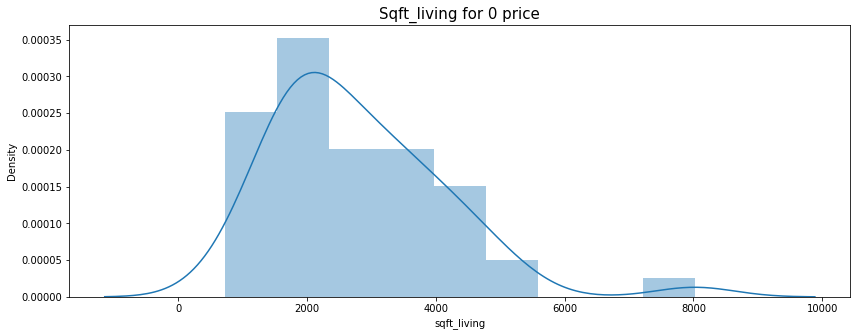

In [11]:
plt.figure(figsize=(14,5))
ax = sns.distplot(df[df["price"]==0].sqft_living)
ax.set_title('Sqft_living for 0 price', fontsize=15)

In [12]:
'''
Majority of the 0 price house's sqft_living ranges between 1000-5000. We have to check its correlation with other columns also.
'''

"\nMajority of the 0 price house's sqft_living ranges between 1000-5000. We have to check its correlation with other columns also.\n"

In [12]:
df1 = df[(df.bedrooms == 4) & (df.bathrooms > 1) & (df.bathrooms < 4) & (df.sqft_living > 2500) & 
         (df.sqft_living < 3000) & (df.floors < 3) & (df.yr_built < 1970)]

In [13]:
df1.price.mean()

735475.0370705189

In [14]:
df['price'].replace(to_replace = 0, value = 735000, inplace = True)
len(df[(df['price'] == 0)])

0

Text(0.5, 1.0, 'Bedrooms VS Price')

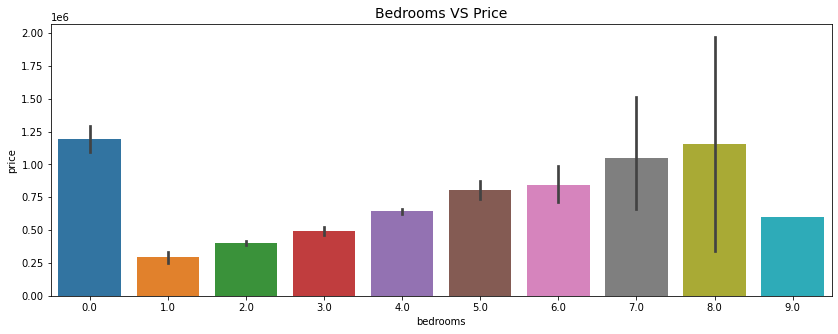

In [66]:
'''
Before moving forward let's quickly deal with 0 bedrooms and bathrooms.
'''
plt.figure(figsize=(14,5))
ax = sns.barplot(x=df['bedrooms'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Price', fontsize=14)

Text(0.5, 1.0, 'Bedrooms VS Sqft_living')

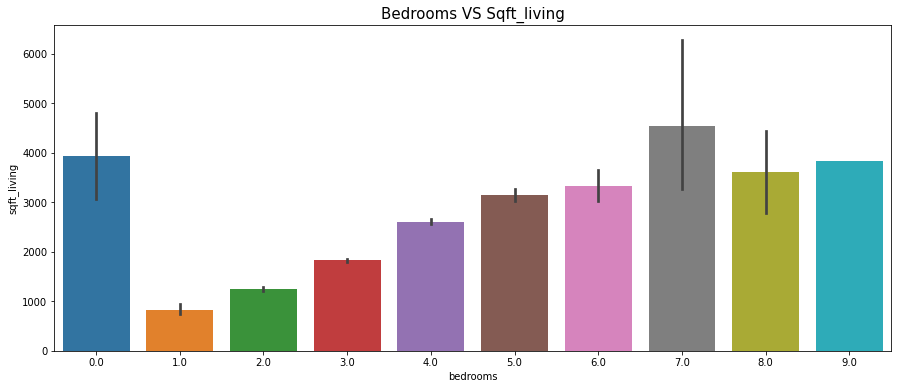

In [18]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bedrooms'], y=df['sqft_living'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Sqft_living', fontsize=15)

In [15]:
'''
As you can also observe sqft living and prices of 8 bedrooms closely related to each other so, let's replace 0 bedrooms with 8
'''
df['bedrooms'].replace(to_replace = 0, value = 8, inplace = True)
len(df[(df['bedrooms'] == 0)])

0

Text(0.5, 1.0, 'Bathrooms VS Price')

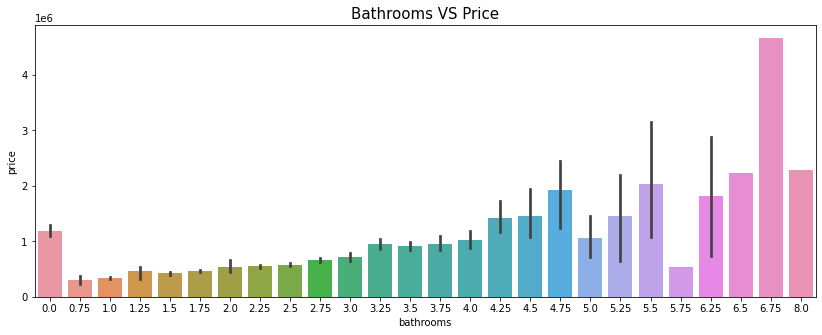

In [20]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x=df['bathrooms'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bathrooms VS Price', fontsize=15)

Text(0.5, 1.0, 'Bathrooms VS Sqft_living')

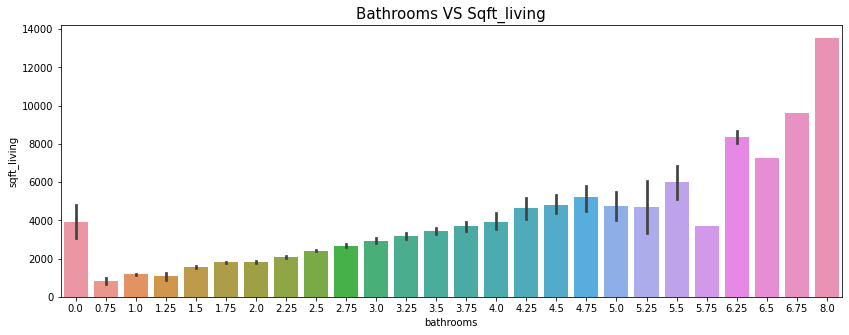

In [21]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x=df['bathrooms'], y=df['sqft_living'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bathrooms VS Sqft_living', fontsize=15)

In [16]:
'''
As you can also observe sqft living and prices of 3.25 bathrooms closely related to each other so, let's replace 0 bathrooms with 3.25
'''
df['bathrooms'].replace(to_replace = 0, value = 3.25, inplace = True)
len(df[(df['bathrooms'] == 0)])

0

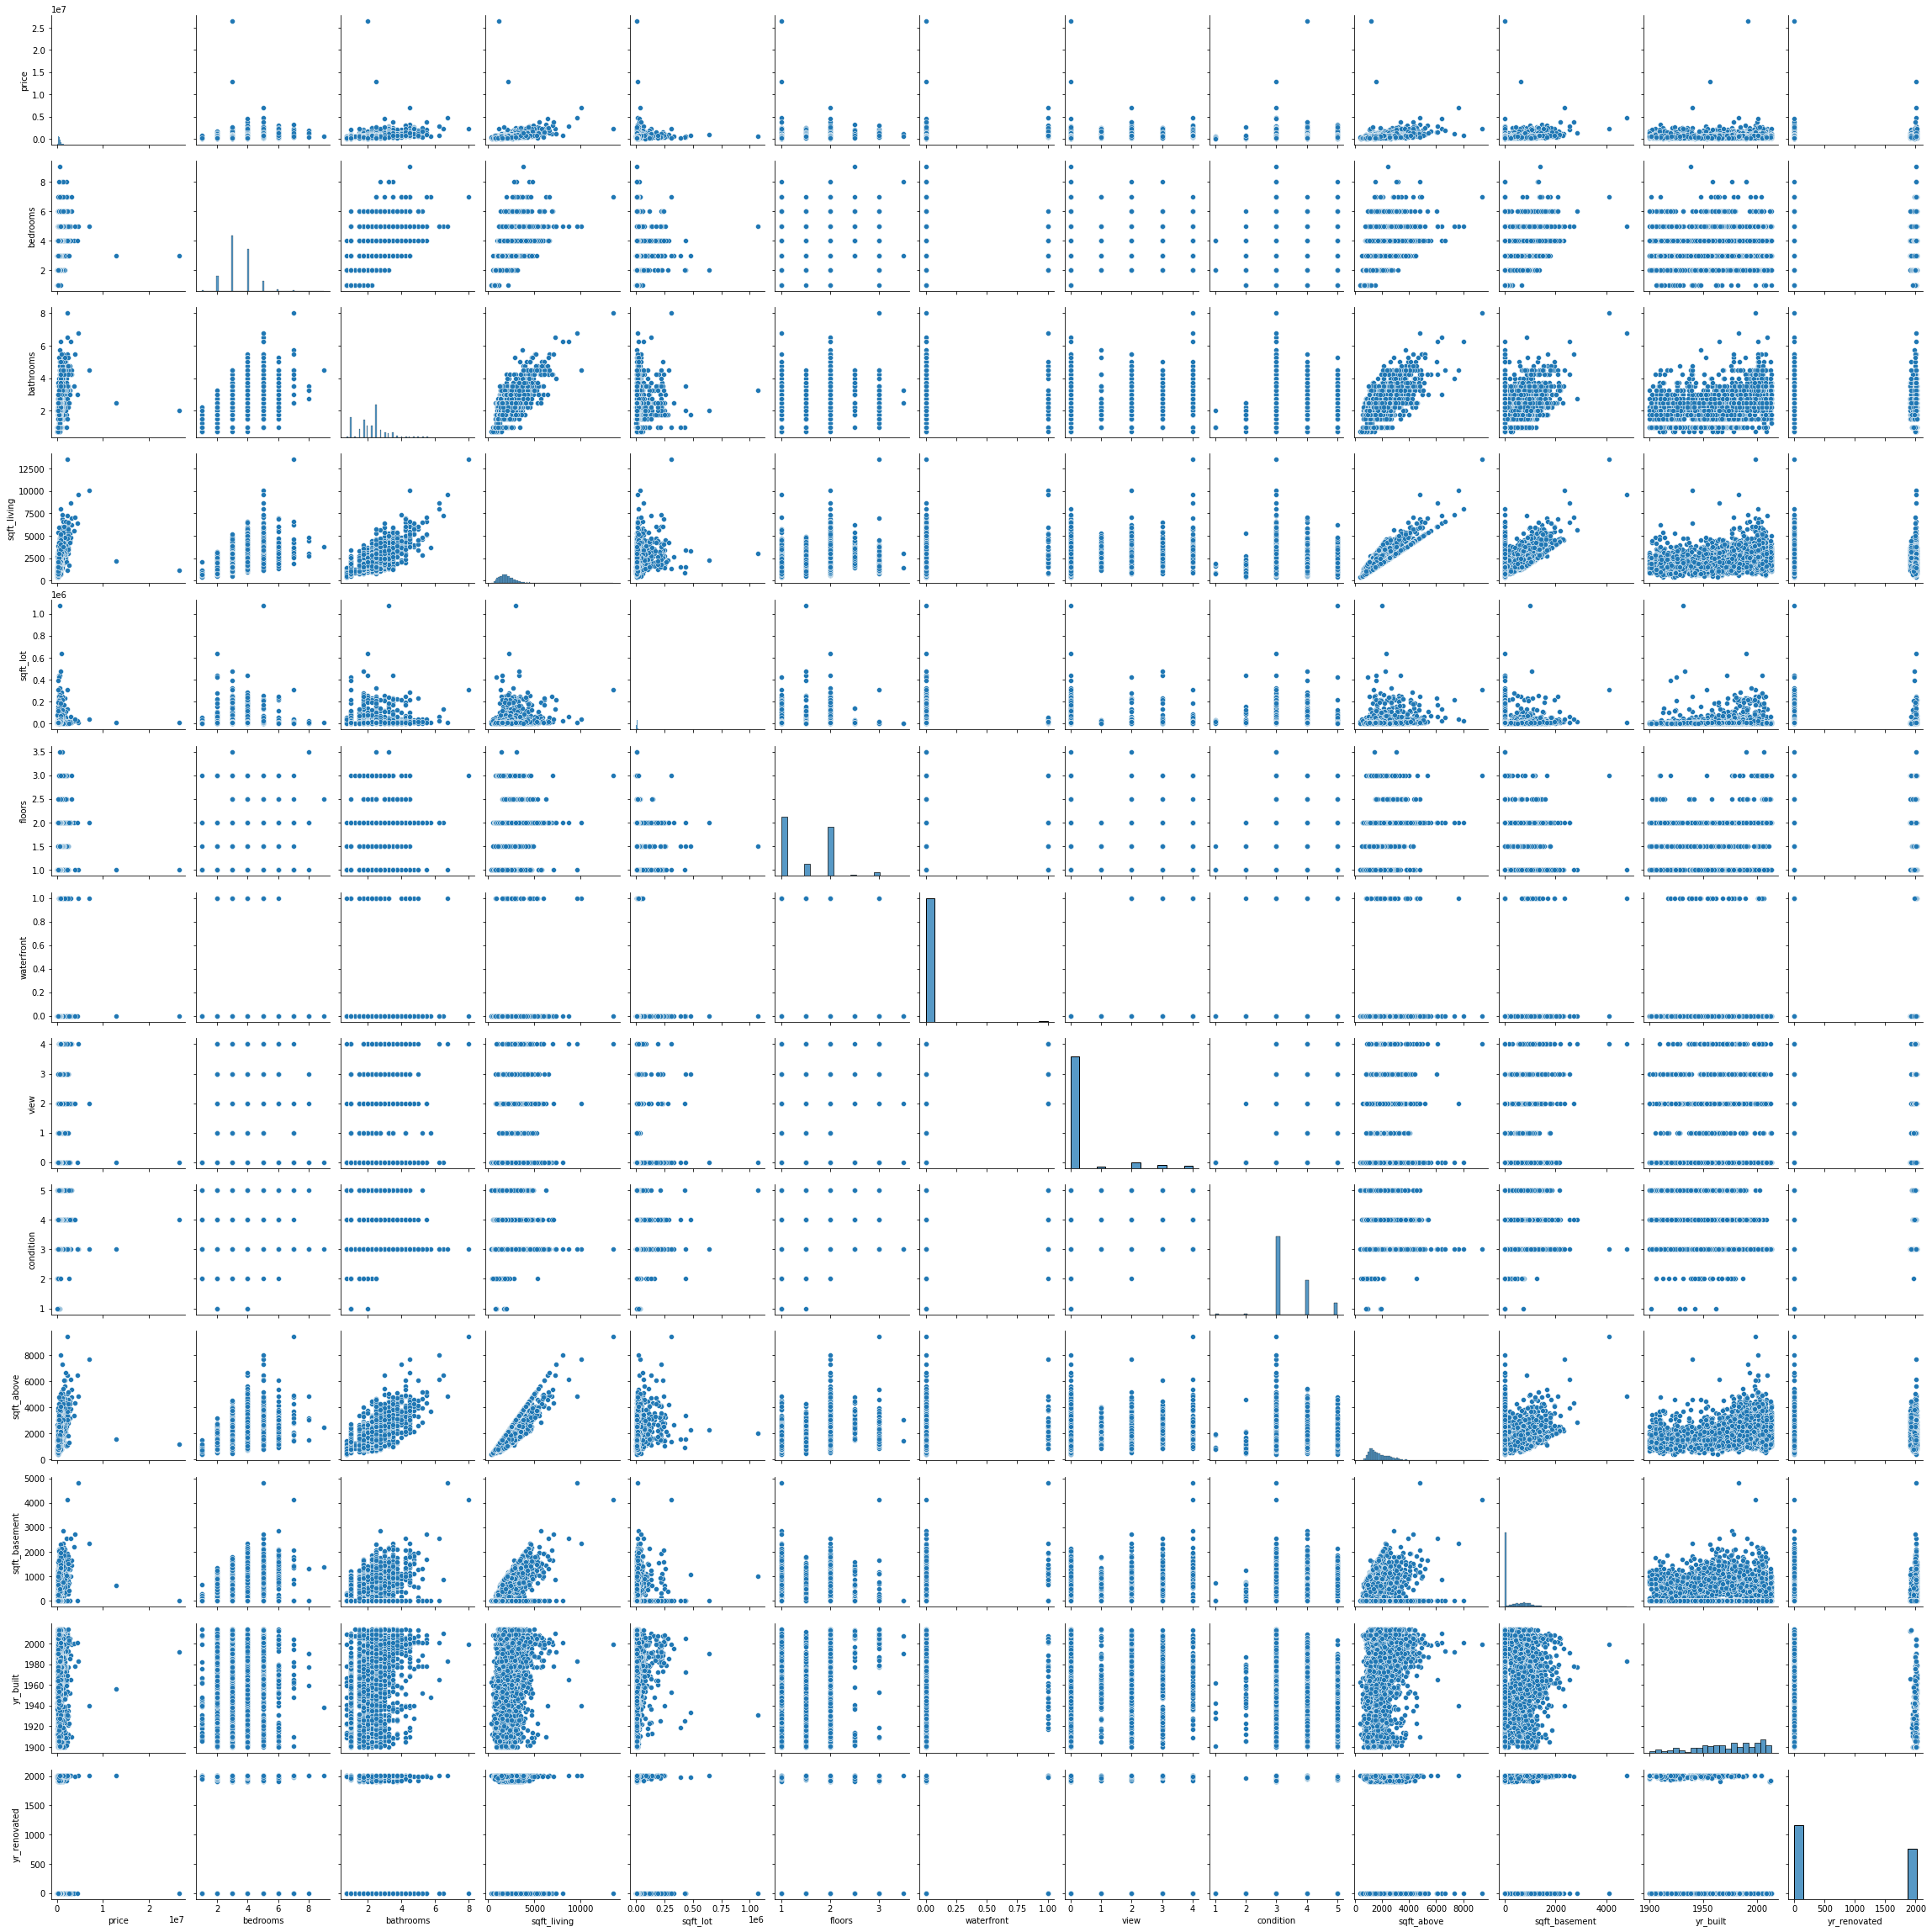

In [ ]:
ax = sns.pairplot(df)

Text(0.5, 1.0, 'Distplot of Price')

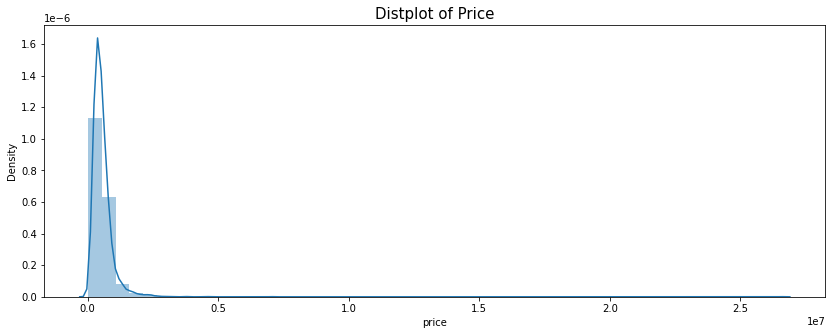

In [23]:
'''
From above visualisation it can be seen that there are alot of outliers.

Let's visualize it more clearly!
'''
plt.figure(figsize=(14,5))
ax = sns.distplot(df['price'], kde=True)
ax.set_title('Distplot of Price', fontsize=15)

In [24]:
'''
Highly negative skewed!! Can be treated by eleminating or replacing outliers.
Outliers: Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, 
experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.

How to detect them:
Scatter plot
Box plot
Z score

Treatment:
Z Score
IQR
Eleminating
Central Tendency Capping.
Z Score: The z-score or standard score of an observation is a metric that indicates how many standard deviations a data point is from the 
sample’s mean, assuming a gaussian distribution. This makes z-score a parametric method. Very frequently data points are not to described 
by a gaussian distribution, this problem can be solved by applying transformations to data ie: scaling it.
'''

'\nHighly negative skewed!! Can be treated by eleminating or replacing outliers.\nOutliers: Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, \nexperimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.\n\nHow to detect them:\nScatter plot\nBox plot\nZ score\n\nTreatment:\nZ Score\nIQR\nEleminating\nCentral Tendency Capping.\nZ Score: The z-score or standard score of an observation is a metric that indicates how many standard deviations a data point is from the \nsample’s mean, assuming a gaussian distribution. This makes z-score a parametric method. Very frequently data points are not to described \nby a gaussian distribution, this problem can be solved by applying transformations to data ie: scaling it.\n'

In [17]:
df['price'] = df['price'].replace([data['price'][np.abs(stats.zscore(data['price'])) > 3]],np.median(df['price']))

Text(0.5, 1.0, 'Distplot of Price')

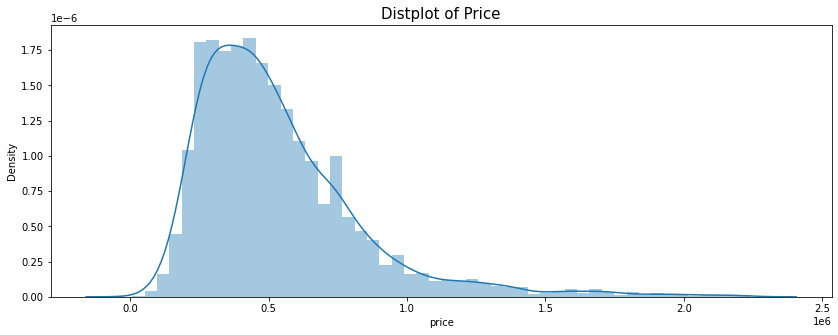

In [68]:
'''
Handling outliers of price columns. As, it is very important because at last we're predicting price and disturbance in its distribution 
might hit hard to our predictions.
'''
plt.figure(figsize=(14,5))
ax = sns.distplot(df['price'], kde=True)
ax.set_title('Distplot of Price', fontsize=15)

Text(0.5, 1.0, 'Sqft_living VS Price')

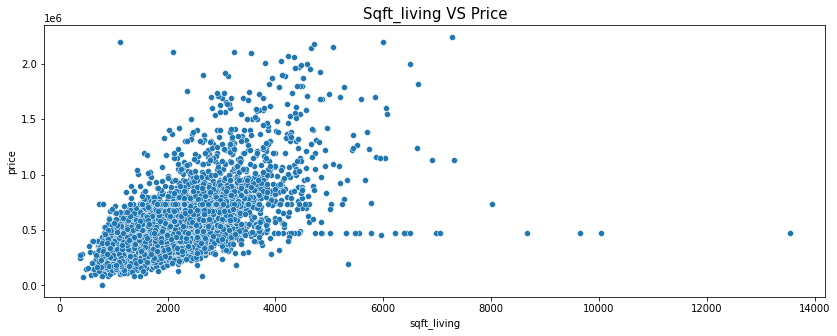

In [27]:
'''
Let us visualize more columns
'''
plt.figure(figsize=(14,5))
ax = sns.scatterplot(data=df, x="sqft_living", y="price")
ax.set_title('Sqft_living VS Price', fontsize=15)

Text(0.5, 1.0, 'Sqft_living VS Price')

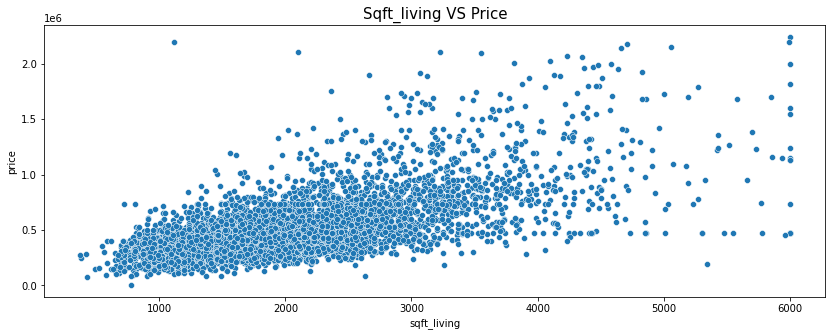

In [28]:
'''
As we can observe that many of the data is less than 6000. So, let's handle this uneven data.
Removing outliers of Sqft_living using different approach.
'''
df['sqft_living'] = np.where((df.sqft_living >6000 ), 6000, df.sqft_living)

plt.figure(figsize=(14,5))
ax = sns.scatterplot(data=df, x="sqft_living", y="price")
ax.set_title('Sqft_living VS Price', fontsize=15)

Text(0.5, 1.0, 'Sqft_above VS Price')

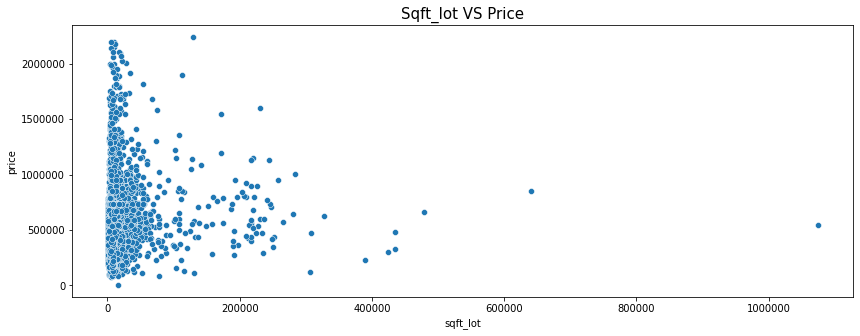

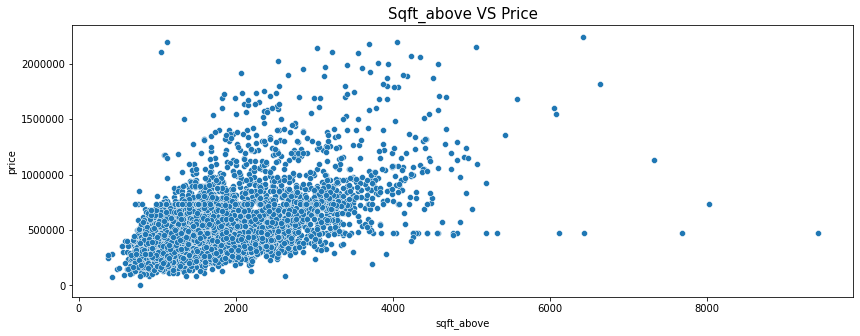

In [29]:
'''
Similarly, doing with rest of the continuous columns.
'''
plt.figure(figsize=(14,5))
ax = sns.scatterplot(data=df, x="sqft_lot", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Sqft_lot VS Price', fontsize=15)

'''
Too much disturbance in this column and also as we checked above is not much correlated to our dependent column price. 
So, I've decided to leave it as it is.
'''
plt.figure(figsize=(14,5))
ax = sns.scatterplot(data=df, x="sqft_above", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Sqft_above VS Price', fontsize=15)




Text(0.5, 1.0, 'Sqft_basement VS Price')

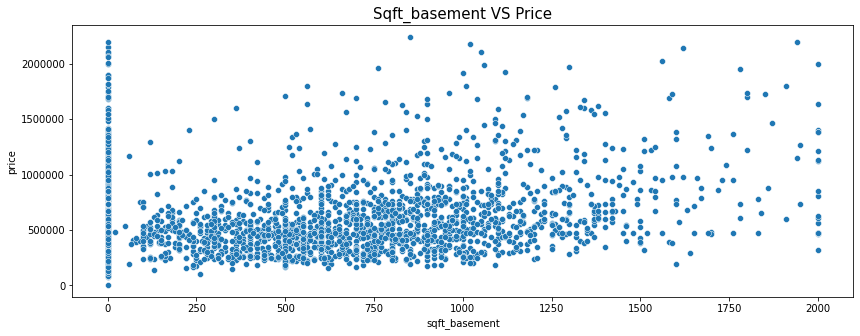

In [50]:
df['sqft_above'] = np.where((df.sqft_above >5000 ), 5000, df.sqft_above)

plt.figure(figsize=(14,5))
ax = sns.scatterplot(data=df, x="sqft_basement", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Sqft_basement VS Price', fontsize=15)

In [18]:
'''
Alot of 0's in sqft_basement but not an outliers because houses might have without basements.
Note: not all extreme points can be treated as outlier. May they are really an authentic data.
Still, let's make extreme large values near 2000.
'''
df['sqft_basement'] = np.where((df.sqft_basement >2000 ), 2000, df.sqft_basement)

Text(0.5, 1.0, 'Bedrooms VS Price')

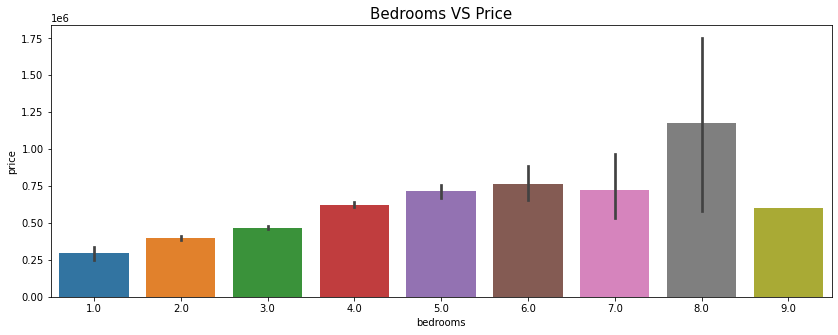

In [19]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x=df['bedrooms'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Price', fontsize=15)

In [20]:
bedroom = df.groupby(['bedrooms']).price.agg([len, min, max])
floor = df.groupby(['floors']).price.agg([len , min, max])
condition = df.groupby(['condition']).price.agg([len , min, max])

In [138]:
print(bedroom)

             len       min        max
bedrooms                             
1.0         38.0   80000.0   735000.0
2.0        566.0    7800.0  1695000.0
3.0       2032.0   83300.0  2147500.0
4.0       1531.0   84350.0  2199900.0
5.0        353.0  185000.0  2238888.0
6.0         61.0  175000.0  2180000.0
7.0         14.0  280000.0  1950000.0
8.0          4.0  340000.0  1970000.0
9.0          1.0  599999.0   599999.0


In [139]:
print(floor)

           len       min        max
floors                             
1.0     2174.0    7800.0  2199900.0
1.5      444.0  132500.0  2027000.0
2.0     1811.0   84350.0  2238888.0
2.5       41.0  195000.0  1990000.0
3.0      128.0  288790.0  2000000.0
3.5        2.0  563500.0  1095000.0


In [140]:
print(condition)

              len      min        max
condition                            
1             6.0   7800.0   550000.0
2            32.0  80000.0   735000.0
3          2875.0  83000.0  2238888.0
4          1252.0  83300.0  2110000.0
5           435.0  83300.0  2147500.0


In [21]:
# Bedrooms
df['bedrooms'] = np.where((df.bedrooms >6 ), 6, df.bedrooms)

#bathrooms
df['bathrooms'] = np.where((df.bathrooms == 0.75), 1, df.bathrooms)
df['bathrooms'] = np.where((df.bathrooms == 1.25 ), 1, df.bathrooms)
df['bathrooms'] = np.where((df.bathrooms > 4.75 ), 5, df.bathrooms)

#floors
df['floors'] = np.where((df.floors == 3.5 ), 3, df.floors)

#condition
df['condition'] = np.where((df.condition == 1 ), 2, df.condition)

In [22]:
X = df.drop(["date",'street', 'city','statezip','sqft_lot','country','price','yr_built','yr_renovated'], axis=1)
y = df[['price']]

In [23]:
train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.3, random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression
mlrm = LinearRegression()
mlrm.fit(train_X,train_y)
mlrm.score(train_X, train_y)*100

45.947254906574585

In [25]:
print("Training accuracy: ", mlrm.score(train_X, train_y))
print("Testing accuracy: ", mlrm.score(test_X, test_y))

Training accuracy:  0.45947254906574586
Testing accuracy:  0.4218897379582248


In [26]:
df.drop(["date",'yr_built','yr_renovated','sqft_lot'], axis=1, inplace = True)

In [27]:
X1 = df.drop(['street', 'city','statezip','country'], axis=1)

In [28]:
X_vif = add_constant(X1)

pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

const             56.190023
price              1.816039
bedrooms           1.692771
bathrooms          2.900919
sqft_living      316.121783
floors             1.823835
waterfront         1.166063
view               1.377955
condition          1.143692
sqft_above       267.529242
sqft_basement     75.603796
dtype: float64

Text(0.5, 1.0, 'CORRELATION MATRIX')

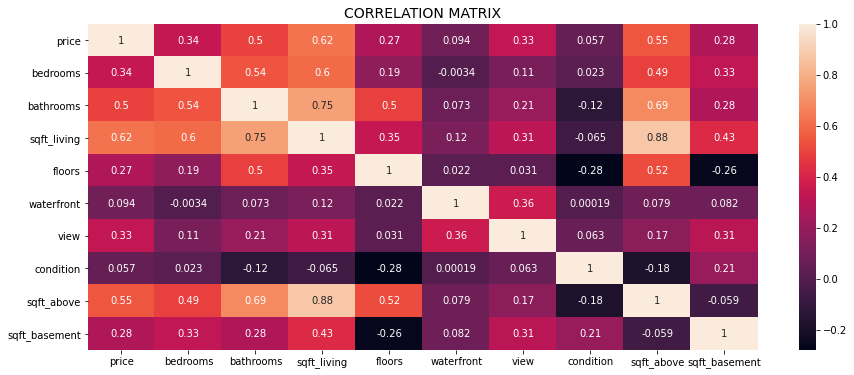

In [29]:
plt.figure(figsize=(15,6))
ax = sns.heatmap(df.corr(),annot = True)
ax.set_title('CORRELATION MATRIX', fontsize=14)

In [30]:
X_vif = X_vif.drop(['sqft_above'],axis = 1)
pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

const            56.189997
price             1.748801
bedrooms          1.680512
bathrooms         2.880517
sqft_living       3.549295
floors            1.822651
waterfront        1.157832
view              1.372696
condition         1.143526
sqft_basement     1.738950
dtype: float64

In [31]:
df.drop(['waterfront','condition','sqft_above'],axis=1, inplace=True)

In [32]:
city = df.groupby(['city']).price.agg([len, min, max])
pd.set_option('display.max_rows',70)
print(city)

                        len            min        max
city                                                 
Algona                  5.0  100000.000000   262000.0
Auburn                176.0   87500.000000   900000.0
Beaux Arts Village      1.0  745000.000000   745000.0
Bellevue              286.0  248000.000000  2150000.0
Black Diamond           9.0  224000.000000   735000.0
Bothell                33.0  347000.000000   749995.0
Burien                 74.0  100000.000000  1035000.0
Carnation              22.0   80000.000000  1680000.0
Clyde Hill             11.0  468750.000000  1388000.0
Covington              43.0   83300.000000  2199900.0
Des Moines             58.0  140000.000000   950000.0
Duvall                 42.0  117833.333333   955000.0
Enumclaw               28.0  107500.000000   735000.0
Fall City              11.0  275000.000000  1600000.0
Federal Way           148.0  120750.000000   819000.0
Inglewood-Finn Hill     1.0  425000.000000   425000.0
Issaquah              187.0 

In [33]:
statezip = df.groupby(['statezip']).price.agg([len, min, max])
pd.set_option('display.max_rows',70)
print(statezip)

           len            min        max
statezip                                
WA 98001  67.0  100000.000000   735000.0
WA 98002  36.0   87500.000000   735000.0
WA 98003  48.0  156000.000000   819000.0
WA 98004  74.0   84350.000000  2150000.0
WA 98005  29.0  497333.333333  1900000.0
...        ...            ...        ...
WA 98188  23.0  110700.000000   735000.0
WA 98198  56.0  140000.000000   950000.0
WA 98199  68.0  193000.000000  1655000.0
WA 98288   3.0  134000.000000   415000.0
WA 98354   2.0  250000.000000   320000.0

[77 rows x 3 columns]


In [34]:
df.drop(['street','city','country'],axis=1, inplace=True)

In [35]:
df = pd.get_dummies(df, columns=['statezip'], prefix = ['statezip'])
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_basement,statezip_WA 98001,statezip_WA 98002,statezip_WA 98003,statezip_WA 98004,statezip_WA 98005,statezip_WA 98006,statezip_WA 98007,statezip_WA 98008,statezip_WA 98010,statezip_WA 98011,statezip_WA 98014,statezip_WA 98019,statezip_WA 98022,statezip_WA 98023,statezip_WA 98024,statezip_WA 98027,statezip_WA 98028,statezip_WA 98029,statezip_WA 98030,statezip_WA 98031,statezip_WA 98032,statezip_WA 98033,statezip_WA 98034,statezip_WA 98038,statezip_WA 98039,statezip_WA 98040,statezip_WA 98042,statezip_WA 98045,statezip_WA 98047,statezip_WA 98050,statezip_WA 98051,statezip_WA 98052,statezip_WA 98053,...,statezip_WA 98059,statezip_WA 98065,statezip_WA 98068,statezip_WA 98070,statezip_WA 98072,statezip_WA 98074,statezip_WA 98075,statezip_WA 98077,statezip_WA 98092,statezip_WA 98102,statezip_WA 98103,statezip_WA 98105,statezip_WA 98106,statezip_WA 98107,statezip_WA 98108,statezip_WA 98109,statezip_WA 98112,statezip_WA 98115,statezip_WA 98116,statezip_WA 98117,statezip_WA 98118,statezip_WA 98119,statezip_WA 98122,statezip_WA 98125,statezip_WA 98126,statezip_WA 98133,statezip_WA 98136,statezip_WA 98144,statezip_WA 98146,statezip_WA 98148,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,468750.0,5.0,2.50,3650,2.0,4,280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,1.0,0,1000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,1.0,0,800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
X1 = df.drop(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'sqft_basement'],axis = 1)
y = df["price"]

In [38]:
val_X, test_X, y_val, test_y = train_test_split(test_X, test_y, test_size=0.2, random_state=42)

In [39]:
import statsmodels.api as sm
mod = sm.OLS(train_y, train_X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     87.76
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:41:33   Log-Likelihood:                -49667.
No. Observations:                3680   AIC:                         9.950e+04
Df Residuals:                    3598   BIC:                         1.000e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bedrooms           4403.2135   4327.84

In [ ]:
#compute the MAE,MSE,RMSE,R2 FOR PREDICTION VALUE
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [37]:
X = df.drop(["price"],axis = 1)
y = df["price"]

train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.2, random_state=8)
mlrm = LinearRegression()
mlrm.fit(train_X,train_y)
print("Training accuracy: ", mlrm.score(train_X, train_y))

Training accuracy:  0.6639531582757524


In [ ]:
rand_state=[]
accuracy=[]
for i in range(1,50,1):
    train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.2, random_state=i)
    mlrm.fit(train_X,train_y)
    accuracy.append(mlrm.score(test_X,test_y))
    rand_state.append(i)

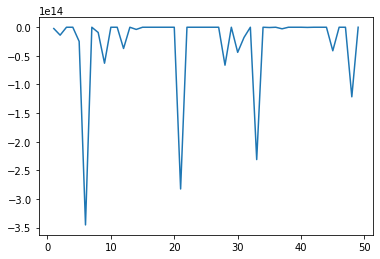

In [45]:
plt.plot(rand_state,accuracy)

In [60]:
test_pred = mlrm.predict(test_X)
train_pred = mlrm.predict(train_X)

print('Train set evaluation:\n_____________________________________')
print_evaluate(train_y, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(test_y, test_pred)

Train set evaluation:
_____________________________________
MAE: 96916.26470546248
MSE: 28770982033.858093
RMSE: 169620.11093575577
R2 Square 0.6776003830215522
__________________________________
Test set evaluation:
_____________________________________
MAE: 103449.3581431147
MSE: 35615758542.61311
RMSE: 188721.3780752279
R2 Square 0.6118947414782333
__________________________________


In [41]:
rf=RandomForestRegressor(n_estimators=300)
rf.fit(train_X,train_y)
print("Training accuracy: ", rf.score(train_X, train_y))
print("Testing accuracy: ", rf.score(test_X, test_y))

Training accuracy:  0.9509324961219573
Testing accuracy:  0.6901952232408287


In [ ]:
rand_state=[]
accuracy=[]
for i in range(1,50,1):
    train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.3, random_state=i)
    rf.fit(train_X,train_y)
    accuracy.append(rf.score(test_X,test_y))
    rand_state.append(i)

In [ ]:
plt.plot(rand_state,accuracy)

In [61]:
test_pred = rf.predict(test_X)
train_pred = rf.predict(train_X)

print('Train set evaluation:\n_____________________________________')
print_evaluate(train_y, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(test_y, test_pred)

IndexError: ignored

In [42]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 2, min_samples_split = 2,
          learning_rate = 0.2, loss = 'ls')
clf.fit(train_X,train_y)
print("Training accuracy: ", clf.score(train_X, train_y))
print("Testing accuracy: ", clf.score(test_X, test_y))

Training accuracy:  0.7677937802737922
Testing accuracy:  0.7329749578124289


In [63]:
rand_state=[]
accuracy=[]
for i in range(1,50,1):
    train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.3, random_state=i)
    clf.fit(train_X,train_y)
    accuracy.append(clf.score(test_X,test_y))
    rand_state.append(i)

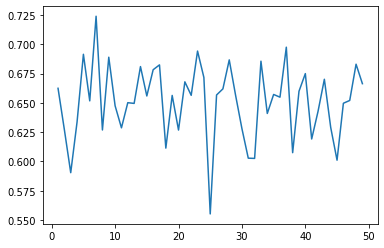

In [64]:
plt.plot(rand_state,accuracy)

In [62]:
test_pred = clf.predict(test_X)
train_pred = clf.predict(train_X)

print('Train set evaluation:\n_____________________________________')
print_evaluate(train_y, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(test_y, test_pred)

Train set evaluation:
_____________________________________
MAE: 92047.12864295075
MSE: 20747665417.559013
RMSE: 144040.49922698483
R2 Square 0.7675074359315835
__________________________________
Test set evaluation:
_____________________________________
MAE: 101016.17568710496
MSE: 30293270154.889164
RMSE: 174049.61980679294
R2 Square 0.6698939479032537
__________________________________


In [56]:
xgb_reg = XGBRegressor()
xgb_reg.fit(train_X, train_y)
print("Training accuracy: ", xgb_reg.score(train_X, train_y))
print("Testing accuracy: ", xgb_reg.score(test_X, test_y))

[19:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training accuracy:  0.693499442531933
Testing accuracy:  0.6290955371404843


In [65]:
rand_state=[]
accuracy=[]
for i in range(1,50,1):
    train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.3, random_state=i)
    xgb_reg.fit(train_X,train_y)
    accuracy.append(xgb_reg.score(test_X,test_y))
    rand_state.append(i)

[20:02:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:02:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

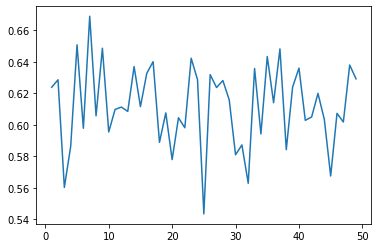

In [66]:
plt.plot(rand_state,accuracy)

In [71]:
test_pred = xgb_reg.predict(test_X)
train_pred = xgb_reg.predict(train_X)

print('Train set evaluation:\n_____________________________________')
print_evaluate(train_y, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(test_y, test_pred)

Train set evaluation:
_____________________________________
MAE: 112708.73397478572
MSE: 27352147979.973404
RMSE: 165384.84809671473
R2 Square 0.693499442531933
__________________________________
Test set evaluation:
_____________________________________
MAE: 118155.56924262825
MSE: 34037270821.57339
RMSE: 184491.9261690695
R2 Square 0.6290955371404843
__________________________________


In [72]:
svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(train_X, train_y)
print("Training accuracy: ", svm_reg.score(train_X, train_y))
print("Testing accuracy: ", svm_reg.score(test_X, test_y))

Training accuracy:  0.4254538328964269
Testing accuracy:  0.4320421935968628


In [69]:
rand_state=[]
accuracy=[]
for i in range(1,50,1):
    train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.3, random_state=i)
    svm_reg.fit(train_X,train_y)
    accuracy.append(svm_reg.score(test_X,test_y))
    rand_state.append(i)

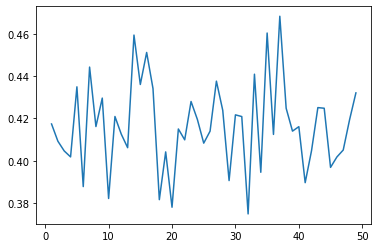

In [70]:
plt.plot(rand_state,accuracy)

In [73]:
test_pred = svm_reg.predict(test_X)
train_pred = svm_reg.predict(train_X)

print('Train set evaluation:\n_____________________________________')
print_evaluate(train_y, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(test_y, test_pred)

Train set evaluation:
_____________________________________
MAE: 157340.42873678415
MSE: 51272571618.669044
RMSE: 226434.47533153833
R2 Square 0.4254538328964269
__________________________________
Test set evaluation:
_____________________________________
MAE: 156975.94920310652
MSE: 52120520531.7048
RMSE: 228299.19082577756
R2 Square 0.4320421935968628
__________________________________
